<a href="https://colab.research.google.com/github/qleisan/colab_test/blob/main/qleisanKerasMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Try a simple feed forward network using Keras/MNIST**
[Inspiration](https://www.kdnuggets.com/2019/10/writing-first-neural-net-less-30-lines-code-keras.html)

In [ ]:
from keras.datasets import mnist
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
network = models.Sequential()
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
saved_test_labels = test_labels

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 10s 21ms/step - loss: 0.2018 - accuracy: 0.9388
Epoch 2/5
469/469 [==============================] - 10s 21ms/step - loss: 0.0734 - accuracy: 0.9776
Epoch 3/5
469/469 [==============================] - 10s 21ms/step - loss: 0.0493 - accuracy: 0.9846
Epoch 4/5
469/469 [==============================] - 10s 20ms/step - loss: 0.0328 - accuracy: 0.9893
Epoch 5/5
469/469 [==============================] - 10s 20ms/step - loss: 0.0265 - accuracy: 0.9912


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.0746 - accuracy: 0.9786
test_acc: 0.978600025177002 test_loss 0.07455185055732727


**So far so good, show some images of numbers and predictions from the trained network**

TODO: save/load weights so no need to retrain  

[read this](https://nextjournal.com/gkoehler/digit-recognition-with-keras)
[and this about revision control](https://medium.com/analytics-vidhya/how-to-use-google-colab-with-github-via-google-drive-68efb23a42d)
---



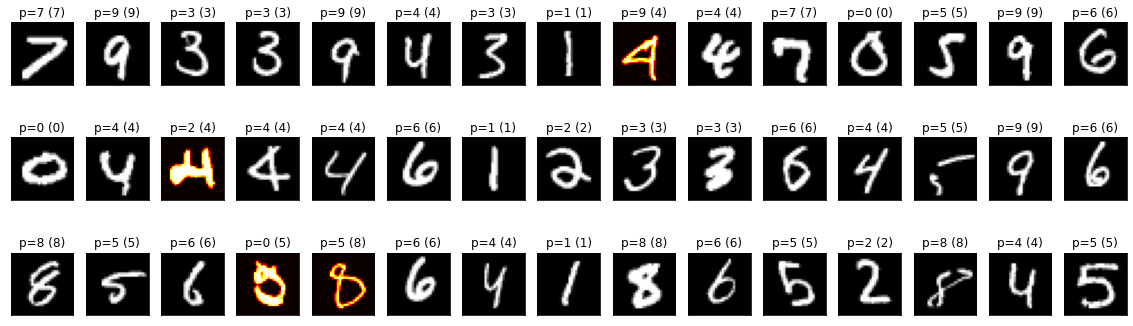

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
num_rows=3
num_col=15
random_offset = randrange(10000-num_rows*num_col)
fig, axs = plt.subplots(num_rows, num_col, figsize=(20,6))
for i in range(0,num_rows*num_col):
  row = i//num_col
  col = i%num_col
  apa = test_images[i+random_offset]
  #print(apa.shape)
  apa=apa.reshape(1,784)
  y = network.predict(apa)
  #apa = test_images[i+random_offset]
  #y = network.predict(np.transpose(apa))
  yp = np.argmax(y,-1).item()
  if yp == saved_test_labels[i+random_offset]:
    mycmap='gray'
  else:
    mycmap='hot'
  axs[row, col].imshow(test_images[i+random_offset].reshape((28,28)), cmap=mycmap, aspect="equal")
  axs[row, col].set_title("p=" + str(yp) + " ("+str(saved_test_labels[i+random_offset])+")")
  axs[row, col].set_xticks([])
  axs[row, col].set_yticks([])

In [ ]:
print(test_images[0].shape)

(784,)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive
